In [40]:
#importing Libraries
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,losses
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

In [41]:
data_dir = "Medicinal Leaf Dataset (1)/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images"
classes = os.listdir(data_dir)
class_names = [re.sub(r'\([^)]*\)', '', c).strip().lower().replace(" ", "_") for c in classes]

label_dict = {class_name: i for i, class_name in enumerate(class_names)}

In [42]:
X = []
y = []

for clazz, class_name in zip(classes, class_names):
    class_dir = os.path.join(data_dir, clazz)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        X.append(img_path)
        y.append(class_name)

In [43]:
df = pd.DataFrame({"X": X, "y": y})
df.to_csv("data.csv", index=False)

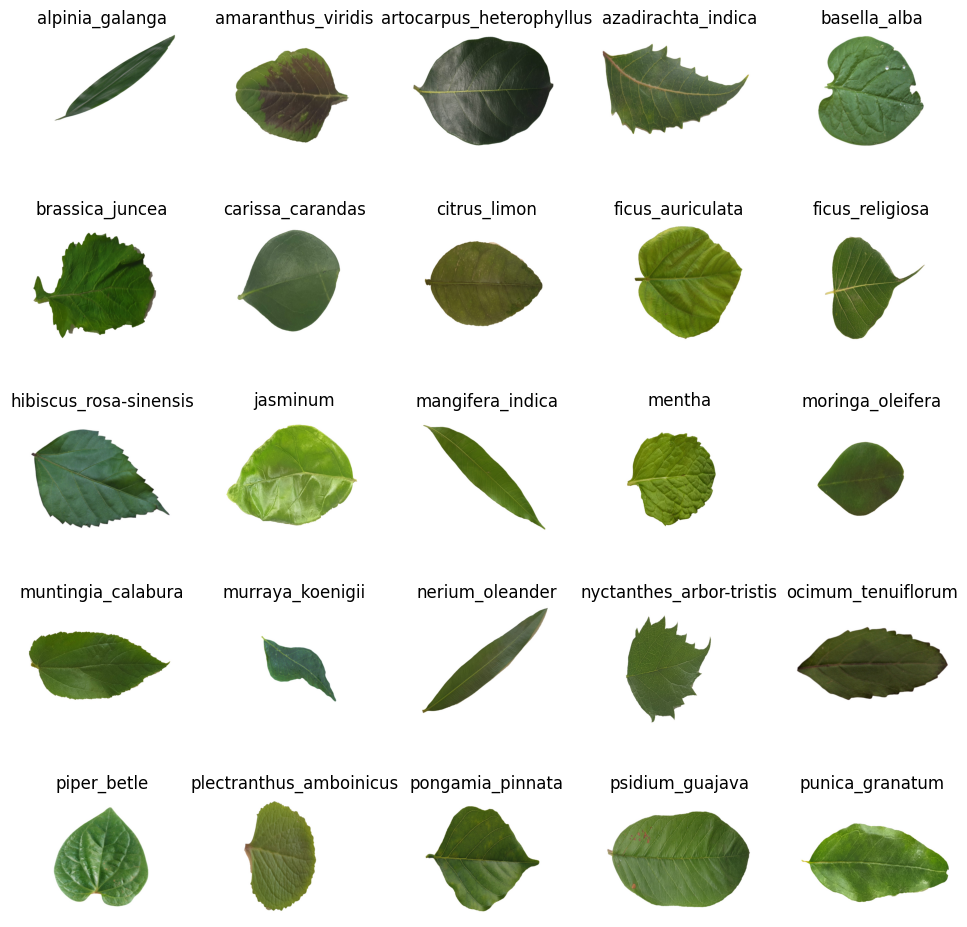

In [44]:
# Display the first photos of each class max 5 in a row
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    img = plt.imread(df[df.y == class_names[i]].iloc[0].X)
    ax.imshow(img)
    ax.set_title(class_names[i])
    ax.axis("off")

plt.show()

In [45]:
data = []
labels = []
for img_path, label in zip(df.X, df.y):
    img = Image.open(img_path)
    img = img.resize((244, 244))
    data.append(np.array(img))
    labels.append(label)

labels = [label_dict[label] for label in labels]
labels = to_categorical(labels, num_classes=len(class_names))



In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [47]:
image_size = (244, 244)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [48]:
train_generator = datagen.flow(
    np.array(X_train),
    y_train,
    batch_size=batch_size,
    shuffle=True,
    subset="training"
)

validation_generator = datagen.flow(
    np.array(X_train),
    y_train,
    batch_size=batch_size,
    shuffle=False,
    subset="validation"
)

In [83]:
#Defining Sequential Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,losses
cnn= Sequential([
                        #cnn layer 
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(244,244,3)),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dropout(rate=0.3),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(30, activation="sigmoid")

])

In [84]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [85]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 122, 122, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 119072)            0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [104]:
history = cnn.fit(train_generator, epochs=28, validation_data=validation_generator)

Epoch 1/28
37/37 [==============================] - 46s 1s/step - loss: 0.4013 - accuracy: 0.8681 - val_loss: 0.5215 - val_accuracy: 0.8601
Epoch 2/28
37/37 [==============================] - 46s 1s/step - loss: 0.3370 - accuracy: 0.8817 - val_loss: 0.5935 - val_accuracy: 0.8225
Epoch 3/28
37/37 [==============================] - 47s 1s/step - loss: 0.3855 - accuracy: 0.8638 - val_loss: 0.4230 - val_accuracy: 0.8805
Epoch 4/28
37/37 [==============================] - 46s 1s/step - loss: 0.3451 - accuracy: 0.8902 - val_loss: 0.5127 - val_accuracy: 0.8532
Epoch 5/28
37/37 [==============================] - 48s 1s/step - loss: 0.3644 - accuracy: 0.8562 - val_loss: 0.5366 - val_accuracy: 0.8498
Epoch 6/28
37/37 [==============================] - 46s 1s/step - loss: 0.3373 - accuracy: 0.8774 - val_loss: 0.5145 - val_accuracy: 0.8942
Epoch 7/28
37/37 [==============================] - 47s 1s/step - loss: 0.3707 - accuracy: 0.8843 - val_loss: 0.5197 - val_accuracy: 0.8396
Epoch 8/28
37/37 [==

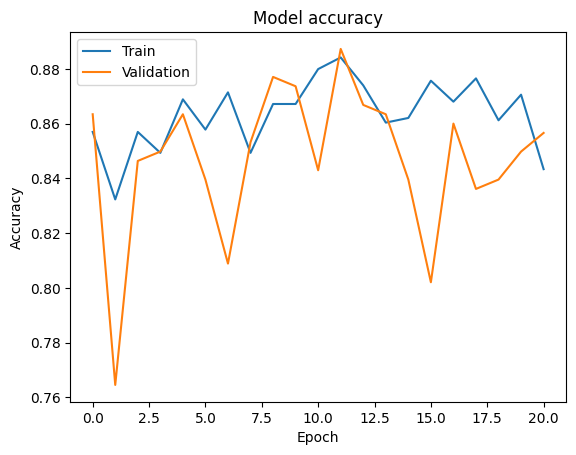

In [97]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


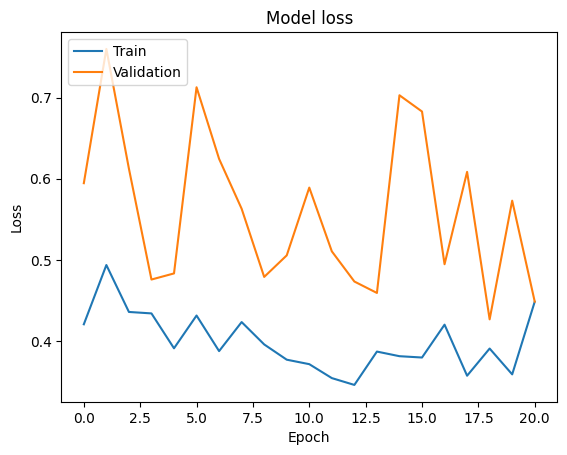

In [98]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [99]:

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow(
    np.array(X_test),
    y_test,
    batch_size=batch_size,
    shuffle=False
)

In [101]:
cnn.evaluate(test_generator)

12/12 [==============================] - 3s 275ms/step - loss: 0.4336 - accuracy: 0.8747


[0.4335970878601074, 0.8746594190597534]

In [103]:
predict_classes = np.argmax(cnn.predict(test_generator), axis= -1)

12/12 [==============================] - 4s 276ms/step
